Iris Flower classification

In [1]:
import numpy as np
import pandas as pd
import sys

dataset = pd.read_csv('IRIS.csv')

dataset.shape

(150, 5)

In [2]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


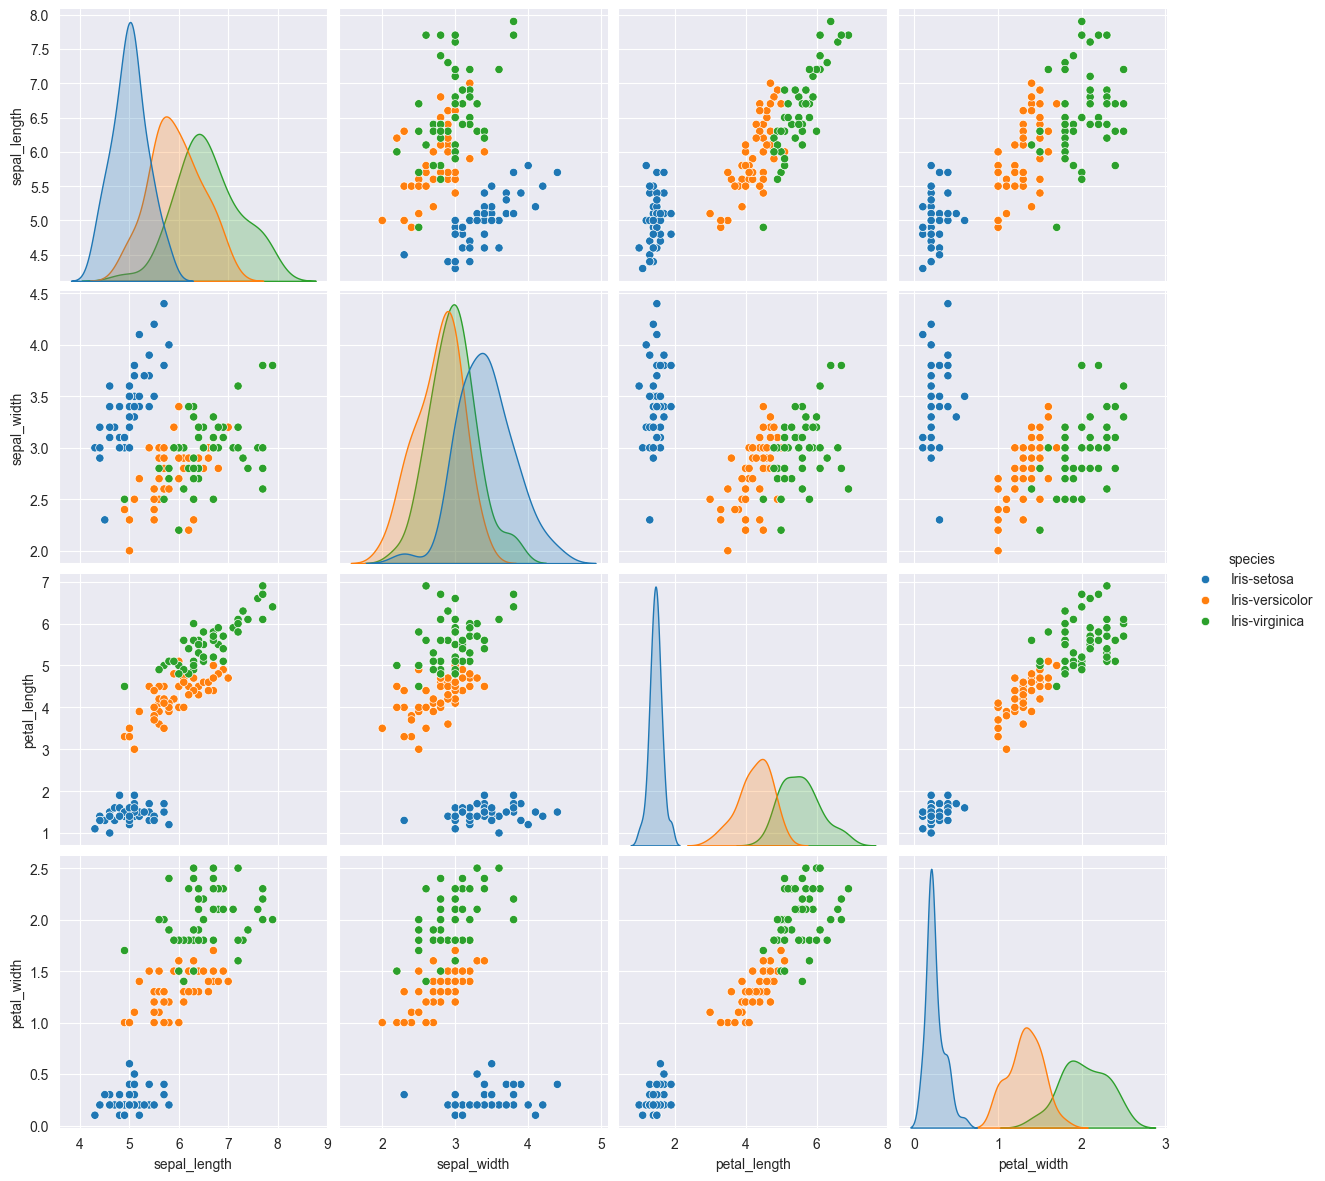

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(dataset, hue="species", height=3)
plt.show()

In [189]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = dataset.copy()  # dataframe
x = df.drop(['species'], axis=1)  # тренировочные/тестовые данные
y = df['species']  # ответы для нейросети

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [210]:
from sklearn.preprocessing import StandardScaler

# разделение данных на обучающие и тренировачные(x_train - input, y_train - output)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

new_y_train = []
for i in range(len(y_train)):
    new_y_train.append([1 if j == y_train[i] else 0 for j in range(3)])
y_train = new_y_train

new_y_test = []
for i in range(len(y_test)):
    new_y_test.append([1 if j == y_test[i] else 0 for j in range(3)])
y_test = new_y_test

In [217]:
np.random.seed(1)

alpha, iterations, hidden_size, input_d, num_labels = (0.001, 250, 8, 4, 3)

weights_0_1 = 0.2 * np.random.random((input_d, hidden_size)) - 0.1
weights_1_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1


 I:0 Error:1.012 Correct:0.375 Test-Err:1.006 Test-Acc:0.4666666666666667
 I:1 Error:1.001 Correct:0.43333333333333335
 I:2 Error:0.992 Correct:0.43333333333333335
 I:3 Error:0.983 Correct:0.4583333333333333
 I:4 Error:0.973 Correct:0.525
 I:5 Error:0.964 Correct:0.6166666666666667
 I:6 Error:0.953 Correct:0.75
 I:7 Error:0.942 Correct:0.7666666666666667
 I:8 Error:0.929 Correct:0.7583333333333333
 I:9 Error:0.914 Correct:0.75
 I:10 Error:0.898 Correct:0.7583333333333333 Test-Err:0.884 Test-Acc:0.7666666666666667
 I:11 Error:0.881 Correct:0.7583333333333333
 I:12 Error:0.861 Correct:0.7583333333333333
 I:13 Error:0.840 Correct:0.7333333333333333
 I:14 Error:0.816 Correct:0.7333333333333333
 I:15 Error:0.791 Correct:0.7333333333333333
 I:16 Error:0.764 Correct:0.7333333333333333
 I:17 Error:0.735 Correct:0.725
 I:18 Error:0.705 Correct:0.725
 I:19 Error:0.674 Correct:0.725
 I:20 Error:0.644 Correct:0.725 Test-Err:0.603 Test-Acc:0.7666666666666667
 I:21 Error:0.613 Correct:0.71666666666

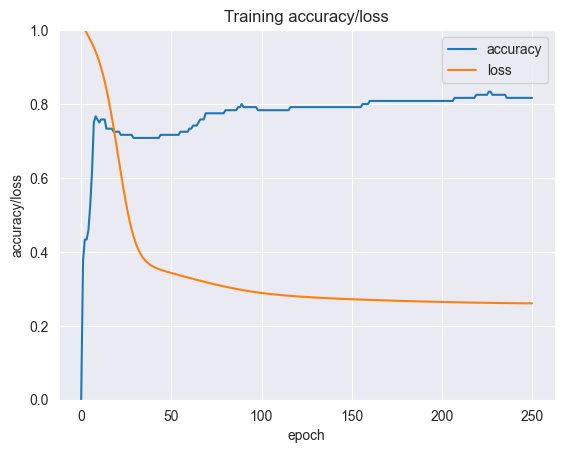

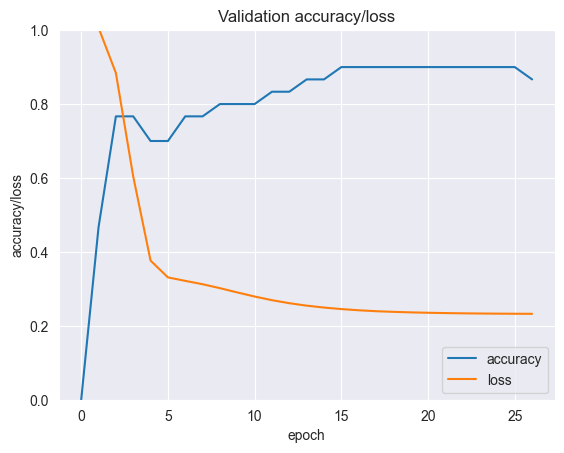

In [218]:
def relu(node):  # activation function
    return (node >= 0) * node


def relu2deriv(output):  # derivative of activation function
    return output >= 0


loss = [1]
accuracy = [0]

loss_test = [1]
accuracy_test = [0]

for interation in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(len(x_train)):
        layer_0 = x_train[i:i + 1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        error += np.sum((layer_2 - y_train[i:i + 1]) ** 2)

        correct_cnt += int(np.argmax(layer_2) == np.argmax(y_train[i:i + 1]))

        layer_2_delta = (y_train[i:i + 1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\n" + " I:" + str(interation) + " Error:" + str(error / float(len(x_train)))[0:5] + " Correct:" + str(correct_cnt / float(len(x_train))))
    loss.append(error / float(len(x_train)))
    accuracy.append(correct_cnt / float(len(x_train)))

    if interation % 10 == 0 or interation == iterations - 1:
        error, correct_cnt = (0.0, 0)
        for i in range(len(x_test)):
            layer_0 = x_test[i:i + 1]
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            error += np.sum((y_test[i:i + 1] - layer_2) ** 2)
            correct_cnt += int(np.argmax(layer_2) == np.argmax(y_test[i:i + 1]))

        sys.stdout.write(" Test-Err:" + str(error / float(len(x_test)))[0:5] + " Test-Acc:" + str(correct_cnt / float(len(x_test))))
        loss_test.append(error / float(len(x_test)))
        accuracy_test.append(correct_cnt / float(len(x_test)))

epoch = [i for i in range(iterations + 1)]
epoch_test = [i for i in range(27)]

plt.plot(epoch, accuracy, label="accuracy")
plt.plot(epoch, loss, label="loss")
plt.title('Training accuracy/loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1)
plt.show()

plt.plot(epoch_test, accuracy_test, label="accuracy")
plt.plot(epoch_test, loss_test, label="loss")
plt.title('Validation accuracy/loss')
plt.xlabel('epoch')
plt.ylabel('accuracy/loss')
plt.legend(loc=0)
plt.ylim(0, 1)
plt.show()